In [1]:
# Imports.
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from nets import Euler
from data_utils import CSVData
from torch.utils.data import DataLoader

# 1. Linear system.

In [2]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1

# Initialise the model.
model = Euler(input_size, num_param, hidden_size, h)

In [3]:
# Load data.
dataset = CSVData(csv_file_path='first_model.csv')
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [4]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.047387975
[1,  4000] loss: 0.002087877
[1,  6000] loss: 0.001295132
[1,  8000] loss: 0.000555174
[1, 10000] loss: 0.000365283
[2,  2000] loss: 0.000286174
[2,  4000] loss: 0.000231937
[2,  6000] loss: 0.000176187
[2,  8000] loss: 0.000071262
[2, 10000] loss: 0.000023478
[3,  2000] loss: 0.000018307
[3,  4000] loss: 0.000017692
[3,  6000] loss: 0.000017651
[3,  8000] loss: 0.000017519
[3, 10000] loss: 0.000017436
[4,  2000] loss: 0.000017350
[4,  4000] loss: 0.000017427
[4,  6000] loss: 0.000017263
[4,  8000] loss: 0.000017174
[4, 10000] loss: 0.000017114
[5,  2000] loss: 0.000017082
[5,  4000] loss: 0.000017008
[5,  6000] loss: 0.000017042
[5,  8000] loss: 0.000016997
[5, 10000] loss: 0.000016944
[6,  2000] loss: 0.000016968
[6,  4000] loss: 0.000016915
[6,  6000] loss: 0.000016901
[6,  8000] loss: 0.000016908
[6, 10000] loss: 0.000016921
[7,  2000] loss: 0.000016840
[7,  4000] loss: 0.000016978
[7,  6000] loss: 0.000016890
[7,  8000] loss: 0.000016874
[7, 10000] los

In [5]:
def flow(alpha, x, y):
    u = -alpha * x - alpha * y
    v = 0.25 * x
    return u,v

In [6]:
def euler(alpha, delta, y):
    u,v= flow(alpha, y[0], y[1])
    return y + delta * np.asarray([u, v])

In [7]:
def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[100:-100:20j, 100:-100:20j]
    U,V = flow(alpha, X, Y)
    trajectory1 = []
    trajectory2 = []
    y1 = [100, -100]
    y2 = [100, -100]
    for i in range(10000):
        trajectory1.append(y1)
        y1 = euler(alpha, 0.01, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    return

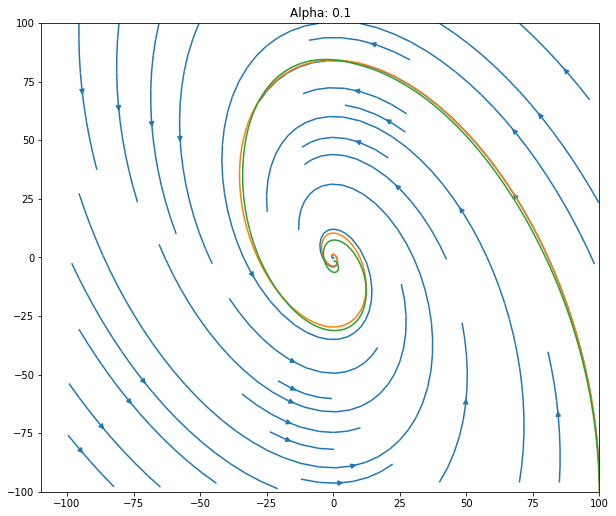

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

alphas = [0.1]

fig = plt.figure(figsize=(10, 50))
gs = gridspec.GridSpec(nrows=5, ncols=1)

for i in range(len(alphas)):
    plot_face_portrait(alphas[i], i, gs, model)

# 2. Andronov-Hopf system

In [9]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1

# Initialise the model.
model_2 = Euler(input_size, num_param, hidden_size, h)

In [10]:
# Load data.
dataset_2 = CSVData(csv_file_path='second_model_2.csv')
dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

In [ ]:
# Loss & optimizer.
criterion_2 = nn.MSELoss()
optimizer_2 = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader_2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer_2.zero_grad()

        # forward + backward + optimize
        outputs = model_2(inputs, params)
        loss = criterion_2(outputs, labels)
        loss.backward()
        optimizer_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.000547908
[1,   400] loss: 0.000083384
[1,   600] loss: 0.000051871
[2,   200] loss: 0.000034287
[2,   400] loss: 0.000028971
[2,   600] loss: 0.000025194
[3,   200] loss: 0.000021253
[3,   400] loss: 0.000019314
[3,   600] loss: 0.000017515
[4,   200] loss: 0.000016068
[4,   400] loss: 0.000015227
[4,   600] loss: 0.000014745
[5,   200] loss: 0.000013811
[5,   400] loss: 0.000013453
[5,   600] loss: 0.000013135
[6,   200] loss: 0.000012789
[6,   400] loss: 0.000012572
[6,   600] loss: 0.000012412


In [ ]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

In [ ]:
def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

In [ ]:
def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-2, 2]
    y2 = [-2, 2]
    for i in range(100000):
        #trajectory1.append(y1)
        #y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    print(trajectory2)
    #ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

alphas = [1.5]

fig = plt.figure(figsize=(10, 50))
gs = gridspec.GridSpec(nrows=5, ncols=1)

for i in range(len(alphas)):
    plot_face_portrait(alphas[i], i, gs, model_2)

In [ ]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-2, 2]
    y2 = [-2, 2]
    for i in range(100000):
        #trajectory1.append(y1)
        #y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    #ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

h = 1
hss = [20, 50]
#bss = [100, 250, 500, 1000]
lrs = [0.001, 0.0001]
mms = [0.1, 0.9]
wds = [0.1, 0.01, 0.001]

hss = [50]
#bss = [100, 250, 500, 1000]
lrs = [0.001]
mms = [0.9]
wds = [0.001]

dataset_2 = CSVData(csv_file_path='second_model_2.csv')
dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

for hs in hss:
    for lr in lrs:
        for mm in mms:
            for wd in wds:
                print('-----------------------------------------------------------')
                print('hs=' + str(hs), 'lr=' + str(lr), 'mm=' + str(mm), 'wd=' + str(wd))
                model = Euler(2, 1, hs, h)
                criterion = nn.MSELoss()
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mm, weight_decay=wd)
                
                for epoch in range(20):  # loop over the dataset multiple times

                    running_loss = 0.0
                    for i, data in enumerate(dataloader_2, 0):
                        # get the inputs; data is a list of [inputs, labels]
                        inputs, params, labels = data
        
                        # zero the parameter gradients
                        optimizer.zero_grad()

                        # forward + backward + optimize
                        outputs = model(inputs, params)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                        # print statistics
                        running_loss += loss.item()
                        if i % 200 == 199:    # print every 2000 mini-batches
                            print('[%d, %5d] loss: %.9f' %
                                  (epoch + 1, i + 1, running_loss / 2000))
                            running_loss = 0.0

                print('Finished Training')
                
                fig = plt.figure(figsize=(5, 25))
                gs = gridspec.GridSpec(nrows=5, ncols=1)
                plot_face_portrait(1.5, 0, gs, model)

In [ ]:
fig = plt.figure(figsize=(5, 25))
gs = gridspec.GridSpec(nrows=5, ncols=1)
plot_face_portrait(1.5, 0, gs, model)